In [89]:
# Import statements

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [91]:
# Reading in out data and assigning x and y values

btc = pd.read_csv("bitcoin-1d-closes.csv")

yaxis = btc.Price
xaxis = btc.Date

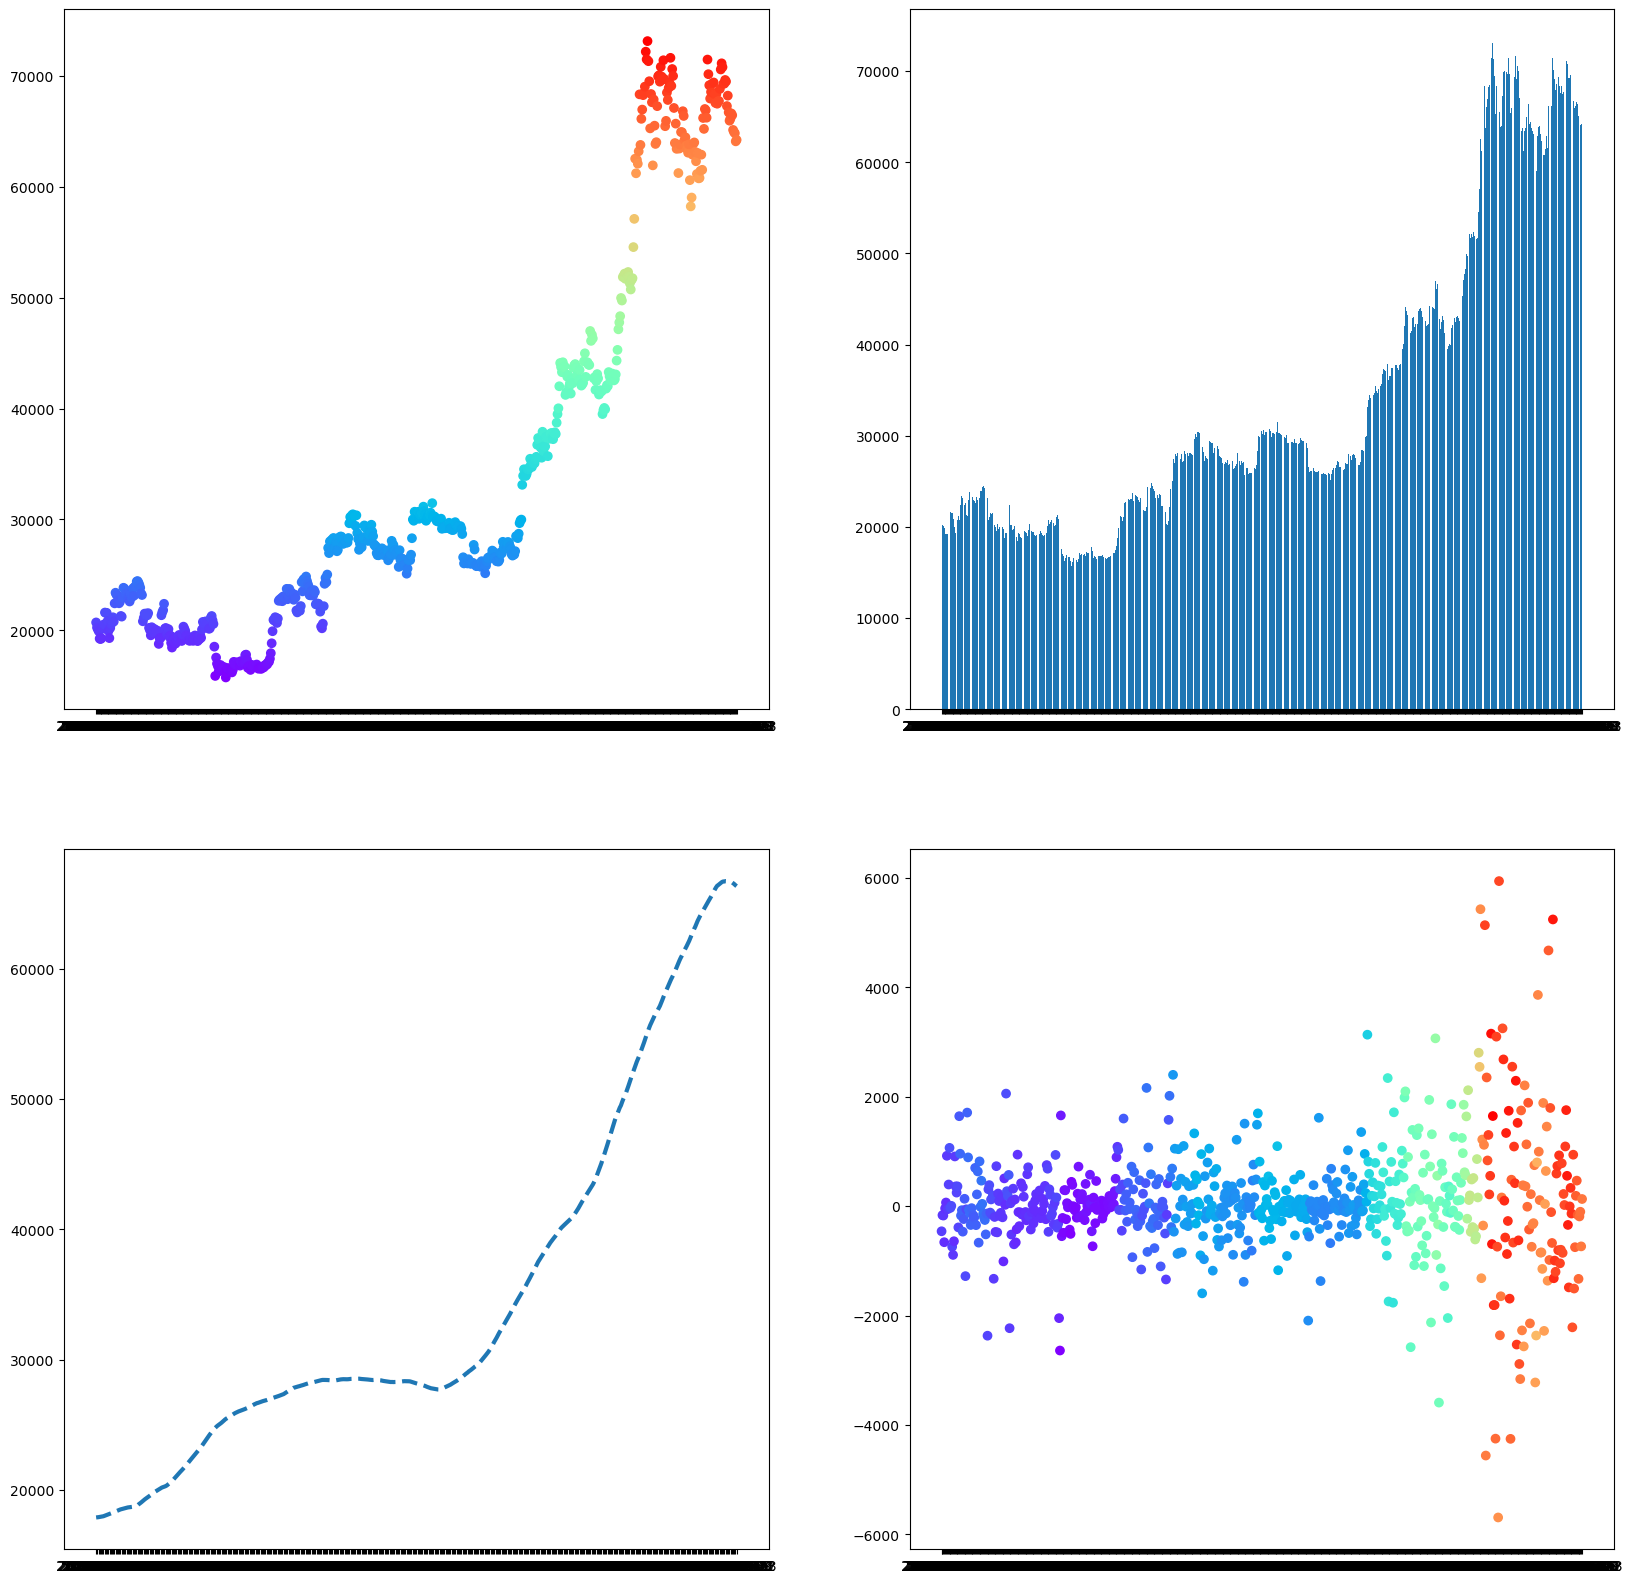

In [203]:
# basic plots of our data

fig, ax=plt.subplots(2,2, figsize=(20,20))
ax[0,0].scatter(xaxis, yaxis, c=btc.Price, cmap="rainbow")
ax[0,1].bar(xaxis, yaxis)


average = 100
avg_data_set=[]
# Create a moving average with a nested for loop and some terrible logic, I know you can do this eaiser in pandas or numpy
for num in range(len(btc.Price)):
    if num <= average:
        continue
    cumsum = 0
    try:
        for x in range(average):
            y = x+num
            cumsum += btc.Price[y]
        avg_data_set.append(cumsum / average)
    except:
        # Absolute shocking way to deal with my own gaps in logic, but this just passes when i run out of data
        pass
        
ax[1,0].plot(xaxis[average*2:], avg_data_set, linewidth=3, linestyle="--")

# Subtracts the previous days close to the current days close to equal the difference 
difference=[]
for num in range(len(btc.Price)):
    if num == 0:
        continue
    difference.append(btc.Price[num] - btc.Price[num - 1])



ax[1,1].scatter(xaxis[1:], difference, c=btc.Price[1:], cmap="rainbow")